# Recurrent Neutral Network
- Able to send *feedback signals* to each other.
- Accept fixed-sized vector as an input and produce a fix-sized vector as output with sequences.

# Vanishing Gradient Problem
- Back-propagation: moving backward in network and calculating gradient of loss
- *Earlier layers* are important for learning and detecting simple patterns
- Solutions: 
  - Do not use Sigmoid and Tanh as an Activation Function
  - We use **ReLU activation function** to improve accuracy

# LSTM & GRU
- Long short term memery and gated recurrent unit
- If the sequences are so long, it is difficult for RNN carry information from earlier time steps to later ones.
- Gates can regulate the flow of information.

# Spam Detection with RNN




# 1)Data Pre-processing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
df=pd.read_csv('/content/25153382-spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#drop garbage columns,we only keep v1 and v2 columns
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#rename columns
df.columns=['labels','data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#create binary labels (0,1)-->create a new column as b_labels
df['b_labels']=df['labels'].map({'ham':0,'spam':1}) #use label encoder with the dictionary
y=df['b_labels'].values

In [10]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33)

In [11]:
#Convert sentence to sequences
max_vocab_size=20000
#Define a tokenizer object
tokenizer=Tokenizer(num_words=max_vocab_size)
#map our tokenizer objects to our sentences we created
tokenizer.fit_on_texts(x_train)
#handle the words appear in our training and testing datasets from text->sequence
sequences_train=tokenizer.texts_to_sequences(x_train)
sequences_test=tokenizer.texts_to_sequences(x_test)

In [12]:
#define our word index and print it out
word2index=tokenizer.word_index
V=len(word2index)
print('Total number of unique tokens are:%s' % V)

Total number of unique tokens are:7189


In [13]:
#Pad train sentences to get N*T matrix, N: # of samples; T:# of time steps
data_train=pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)

Shape of data train tensor: (3733, 189)


In [14]:
#set the value of T to get sequence length, just the same as the first two checking results
T=data_train.shape[1]

In [15]:
print(T)

189


In [16]:
#Pad test sentences
data_test=pad_sequences(sequences_test,maxlen=T)
#maxlen=T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2)Build the Model

In [17]:
#Choose the embedding dimensionality
D=20  #the hyperparameter, we choose any word vector size that we want

#Hidden state vectorization
M=15

#Input layer,every single record has been represented to be the 189 record
i=Input(shape=(T,))

#Embedding layer, return sequences of word vectors, V is unique token
x= Embedding(V+1,D)(i) #it will return a N*T*D array, we want size of embedding to (V+1) *D, because first word index start from 1, not from 0

#LSTM layer
x=LSTM(M,return_sequences=True)(x) #we are not care about encoding decoding issue
x=GlobalMaxPooling1D()(x) 

#Dense Layer
x= Dense(1,activation='sigmoid')(x)

model=Model(i,x)

In [18]:
#compile the model,we deal with binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#train the model
r=model.fit(x=data_train,y=y_train,epochs=10,validation_data=(data_test,y_test)) #10次迭代

Epoch 1/10
117/117 [==============================] - 19s 125ms/step - loss: 0.4794 - accuracy: 0.8663 - val_loss: 0.4249 - val_accuracy: 0.8488
Epoch 2/10
117/117 [==============================] - 13s 113ms/step - loss: 0.3792 - accuracy: 0.8744 - val_loss: 0.4261 - val_accuracy: 0.8488
Epoch 3/10
117/117 [==============================] - 10s 87ms/step - loss: 0.3780 - accuracy: 0.8744 - val_loss: 0.4283 - val_accuracy: 0.8488
Epoch 4/10
117/117 [==============================] - 10s 87ms/step - loss: 0.3781 - accuracy: 0.8744 - val_loss: 0.4264 - val_accuracy: 0.8488
Epoch 5/10
117/117 [==============================] - 11s 98ms/step - loss: 0.3773 - accuracy: 0.8744 - val_loss: 0.4237 - val_accuracy: 0.8488
Epoch 6/10
117/117 [==============================] - 10s 87ms/step - loss: 0.3728 - accuracy: 0.8744 - val_loss: 0.4160 - val_accuracy: 0.8488
Epoch 7/10
117/117 [==============================] - 10s 87ms/step - loss: 0.3210 - accuracy: 0.8744 - val_loss: 0.2786 - val_accurac

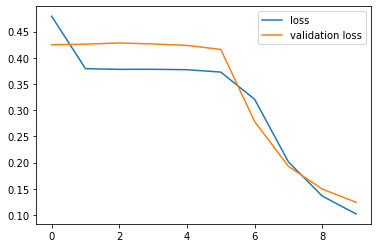

In [20]:
#Evaluation: loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

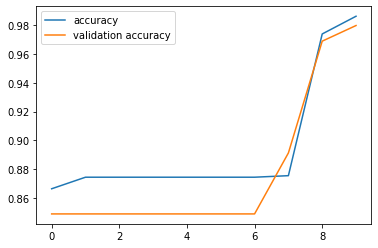

In [21]:
#Accuracy score
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show() 